# Similarity-based Learning

Similiarity-based approaches in machine learning come from the idea that the best way to make predictions is simply to look at what has worked in the past and predict the same thing again. The fundamental concepts required to build a system based on this idea are feature spaces and measures of similarity.

## Reading

1. Chapter 5 of [Fundamentals of Machine Learning for Predictive Data Analytics](https://mitpress.mit.edu/books/fundamentals-machine-learning-predictive-data-analytics)
3. [Chapter 5 Slides 'A'](http://131.96.197.204/~pmolnar/mlbook/BookSlides_5A_Similarity-based-Learning.pdf) (internal)
3. [Chapter 5 Slides 'B'](http://131.96.197.204/~pmolnar/mlbook/BookSlides_5B_Similarity-based-Learning.pdf) (internal)

Slides are posted on the internal server http://131.96.197.204/~pmolnar/mlbook


## What is a metric?

The "distance" $d$ between two points in a vector space must satisfy the following requirements:
* It is **non-negative**: $d(x,y) \geq 0$ for all $x$, $y$, with $d(x,y) = 0$ if and only if $x = y$
* It is **symmetric**: $d(x,y) = d(y,x)$
* It satisfies the **triangle inequality**: $d(x,y) \leq d(x,z) + d(z,y)$

Some common measures of distance:

### Euclidean distance

This is perhaps the most commonly used distance metric: $d(X,Y) = \sqrt{(X_0-Y_0)^2 + (X_1-Y_1)^2}$.

In [33]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
%matplotlib inline

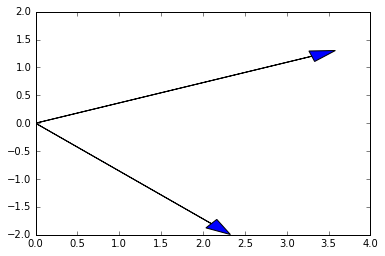

In [28]:
X = np.array([3.3, 1.2])
Y = np.array([2.1, -1.8])

plt.arrow(0,0,*X, head_width=0.2);
plt.arrow(0,0,*Y, head_width=0.2);
plt.xlim([0, 4]);
plt.ylim([-2,2]);
plt.show();

In [18]:
# Euclidean distance manually:
ma.sqrt(np.sum((X-Y)**2))

3.2310988842807022

In [15]:
# numpy norm:
np.linalg.norm(X-Y)

3.2310988842807022

### More general Minkowski distance

In a d-dimensional vector space, the Minkowski distance of order $p$ is defined as:

$d_p(X,Y) = \left(\sum_{i=1}^{d} \left|X_i - Y_i\right|^p \right)^{1/p}$

The Euclidean distance is a special case of the Minkowski distance with $p=2$. 

Some other common cases include:

* The Manhattan distance: $p = 1$
* The Chebyshev distance: $p = \infty$, where $d_\infty(X,Y) = \max_{i = 0,\ldots,n}\left| X_i - Y_i \right|$

In [34]:
import scipy.spatial.distance as dst

In [25]:
# Manhattan distance
dst.cdist(np.expand_dims(X, axis=0),np.expand_dims(Y, axis=0),'cityblock')

array([[ 4.2]])

In [26]:
# Chebyshev distance
dst.cdist(np.expand_dims(X, axis=0),np.expand_dims(Y, axis=0),'chebyshev')

array([[ 3.]])

## Scaling the Axes

The Euclidean distance can be written in (suggestive) vector notation as:

$d^2(X,Y) = (X-Y)^T I_{n \times n} (X-Y)$

Instead of the $n \times n$ identity matrix, we could use and positive definite matrix. 

A **positive definite** matrix is defined as a matrix $M$ for which $z^T M z \geq 0$ for all real vectors $z$, with equality only if $z$ is the vector of all zeros.

We can use this matrix to appropriately rescale the axes, for example to correct for high variance along a given dimension in our feature space: this gives us the Mahalanobis metric, 

$d_M(X,Y) = (X-Y)^T \Sigma^{-1} (X-Y)$,

where $\Sigma$ is the covariance matrix of your data points.

## Additional reading:

Distances between words (taking into account the context):

http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/

# Let's try some clustering

In [56]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [54]:
# read in the basketball draft dataset
df = pd.read_csv('./Table5-2.csv', names=['ID','Speed','Agility','Draft'], skiprows=[0])

df.head()

,ID,Speed,Agility,Draft
0,1,2.50,6.00,no
1,2,3.75,8.00,no
2,3,2.25,5.50,no
3,4,3.25,8.25,no
4,5,2.75,7.50,no


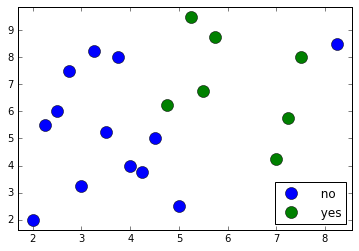

In [53]:
fig, ax = plt.subplots()
ax.margins(0.05)
groups = df.groupby('Draft')
for name, group in groups:
    ax.plot(group.Speed, group.Agility, marker='o', linestyle='', ms=12, label=name);
ax.legend(numpoints=1, loc='lower right');

## Nearest-neighbor clustering

In [60]:
# Let's fit a nearest-neighbor model to our data, using Euclidean distance...
nearest_neighbor_model = NearestNeighbors(1, metric='euclidean').fit(df[['Speed','Agility']], df['Draft'])

In [79]:
# OK, now let's find the nearest neighbors for some new data points!
samples = np.array([[7,7],[5,5]]) # samples to classify, in [speed, agility] format

18      yes
5        no
Name: Draft, dtype: object

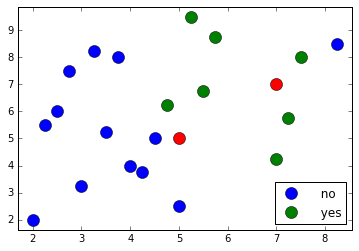

In [82]:
fig, ax = plt.subplots()
ax.margins(0.05)
groups = df.groupby('Draft')
for name, group in groups:
    ax.plot(group.Speed, group.Agility, marker='o', linestyle='', ms=12, label=name);
ax.legend(numpoints=1, loc='lower right');
ax.plot(samples[:,0],samples[:,1], marker='o', linestyle='', ms=12, c='red');

In [83]:
df.Draft.iloc[nearest_neighbor_model.kneighbors(samples, return_distance=False).ravel()] # the kneighbors method returns the index of the
                                                                                         # nearest neighbors....

18      yes
5        no
Name: Draft, dtype: object

In [70]:
nearest_neighbor_model.kneighbors([[7,7],[5,4]], return_distance=False).ravel()

array([18,  9])

## K-Nearest Neighbors Classifier

The NearestNeighbors function helps us recover the neighbors that are closest to the desired data point; but if we're interested in using k-nearest neighbors for classification, we can use KNeighborsClassifier.

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
# define model and train it on the input data
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(df[['Speed','Agility']], df['Draft'])

In [90]:
# predict classes for "samples", using k nearest neighbors
knn_model.predict(samples)

array(['  yes', '  no'], dtype=object)

In [91]:
from nltk.cluster.kmeans import KMeansClusterer

In [92]:
help(KMeansClusterer)

Help on class KMeansClusterer in module nltk.cluster.kmeans:

class KMeansClusterer(nltk.cluster.util.VectorSpaceClusterer)
 |  The K-means clusterer starts with k arbitrary chosen means then allocates
 |  each vector to the cluster with the closest mean. It then recalculates the
 |  means of each cluster as the centroid of the vectors in the cluster. This
 |  process repeats until the cluster memberships stabilise. This is a
 |  hill-climbing algorithm which may converge to a local maximum. Hence the
 |  clustering is often repeated with random initial means and the most
 |  commonly occurring output means are chosen.
 |  
 |  Method resolution order:
 |      KMeansClusterer
 |      nltk.cluster.util.VectorSpaceClusterer
 |      nltk.cluster.api.ClusterI
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, num_means, distance, repeats=1, conv_test=1e-06, initial_means=None, normalise=False, svd_dimensions=None, rng=None, avoid_empty_clusters=False)
 |      :p